In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
CarsMPG = pd.read_csv('auto-mpg.csv')
CarsMPG.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
CarsMPG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
CarsMPG.shape

(398, 9)

In [7]:
CarsMPG = CarsMPG.replace('?', np.nan)

In [8]:
CarsMPG = CarsMPG.dropna()

In [9]:
CarsMPG.shape

(392, 9)

In [11]:
CarsMPG.drop(['origin', 'car name'], axis=1, inplace=True)

In [12]:
CarsMPG.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
114,26.0,4,98.0,90,2265,15.5,73
174,18.0,6,171.0,97,2984,14.5,75
31,25.0,4,113.0,95,2228,14.0,71
192,22.0,6,250.0,105,3353,14.5,76
235,26.0,4,97.0,75,2265,18.2,77


In [13]:
CarsMPG['model year'] = '19' + CarsMPG['model year'].astype(str)

In [14]:
CarsMPG.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
217,30.0,4,111.0,80,2155,14.8,1977
54,35.0,4,72.0,69,1613,18.0,1971
58,25.0,4,97.5,80,2126,17.0,1972
91,13.0,8,400.0,150,4464,12.0,1973
391,36.0,4,135.0,84,2370,13.0,1982


In [15]:
CarsMPG['age'] = datetime.datetime.now().year - pd.to_numeric(CarsMPG['model year'])

In [16]:
CarsMPG.drop(['model year'], axis=1, inplace=True)

In [17]:
CarsMPG.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
189,15.5,8,304.0,120,3962,13.9,44
389,22.0,6,232.0,112,2835,14.7,38
2,18.0,8,318.0,150,3436,11.0,50
41,14.0,8,318.0,150,4096,13.0,49
195,29.0,4,85.0,52,2035,22.2,44


In [18]:
CarsMPG.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [19]:
CarsMPG['horsepower'] = pd.to_numeric(CarsMPG['horsepower'], errors='coerce')

In [20]:
CarsMPG.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


Text(0, 0.5, 'Miles Per Gallon')

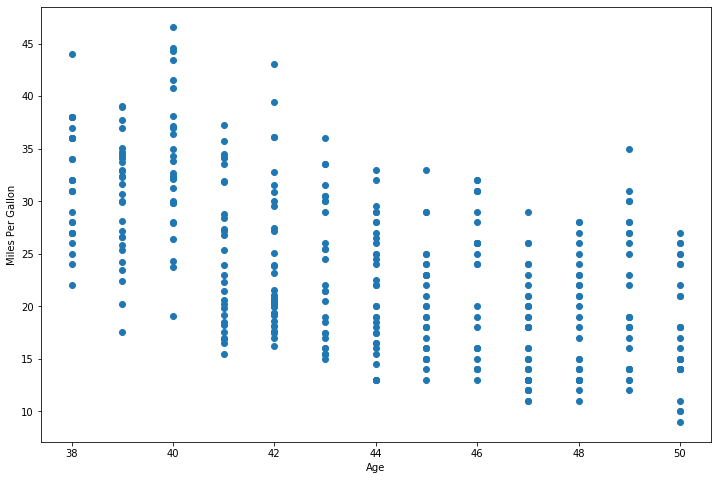

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(CarsMPG['age'], CarsMPG['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles Per Gallon')

Cars with LONGER ages have LOWER mpgs than cars with LOWER ages

Text(0, 0.5, 'Miles Per Gallon')

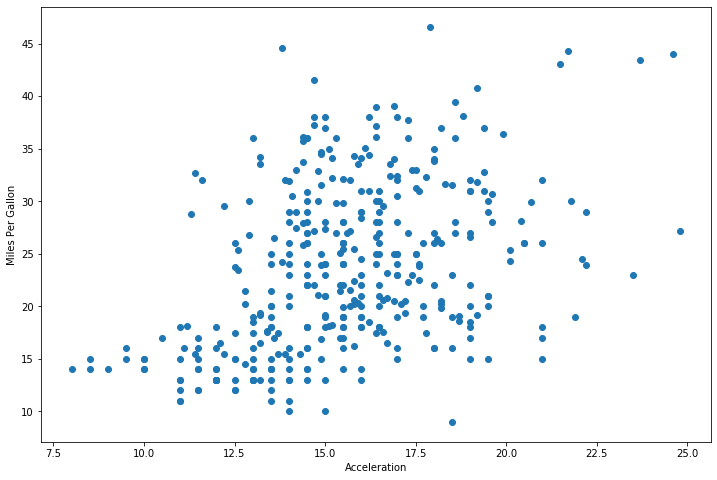

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(CarsMPG['acceleration'], CarsMPG['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles Per Gallon')

Cars with HIGHER acceleration have HIGHER mpg.

Text(0, 0.5, 'Miles Per Gallon')

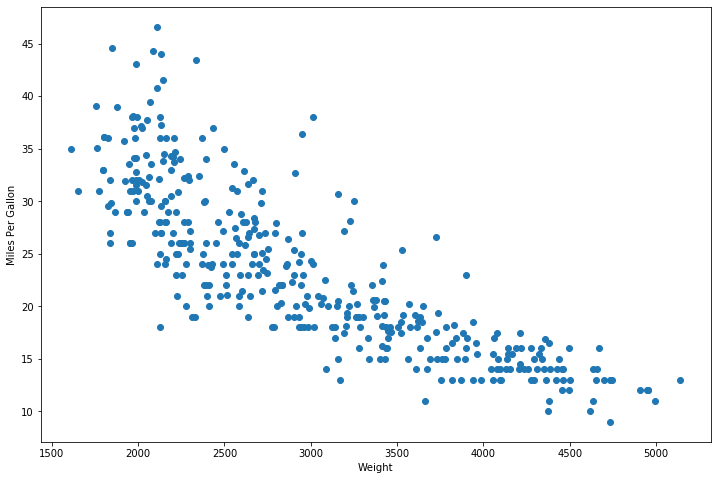

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(CarsMPG['weight'], CarsMPG['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

Cars that WEIGH more have LOWER mpg

Text(0, 0.5, 'Miles Per Gallon')

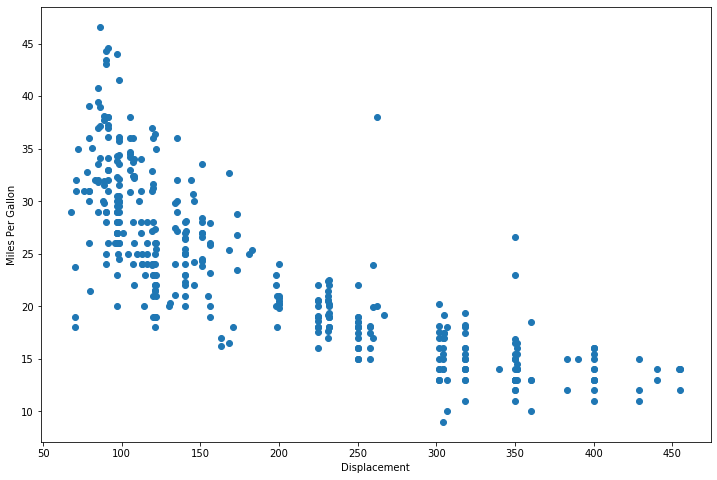

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(CarsMPG['displacement'], CarsMPG['mpg'])

plt.xlabel('Displacement')
plt.ylabel('Miles Per Gallon')

Cars with GREATER DISPLACEMENT have LOWER mpgs.

Text(0, 0.5, 'Miles Per Gallon')

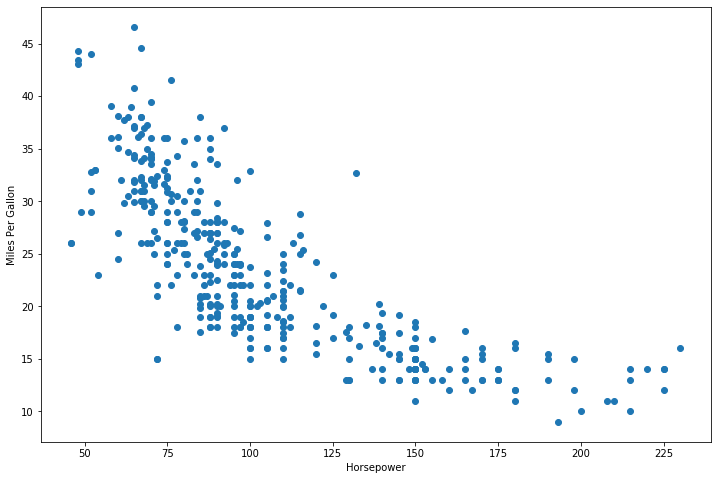

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(CarsMPG['horsepower'], CarsMPG['mpg'])

plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')

Cars with GREATER HORSEPOWER(rate at which the engine work/speed) have LOWER MPGS(burn fuel faster)

Text(0, 0.5, 'Miles Per Gallon')

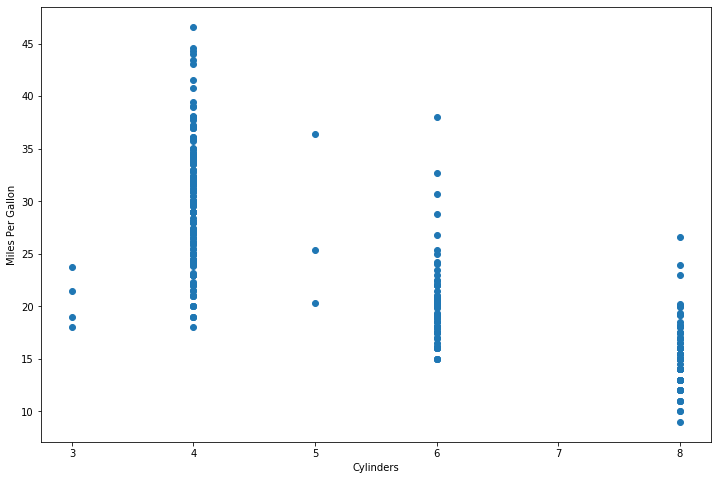

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(CarsMPG['cylinders'], CarsMPG['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles Per Gallon')

Cars with LOWER cylinders have HIGHER mpgs(Fuel economy).

In [30]:
CarsMPG_corr = CarsMPG.corr()
CarsMPG_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


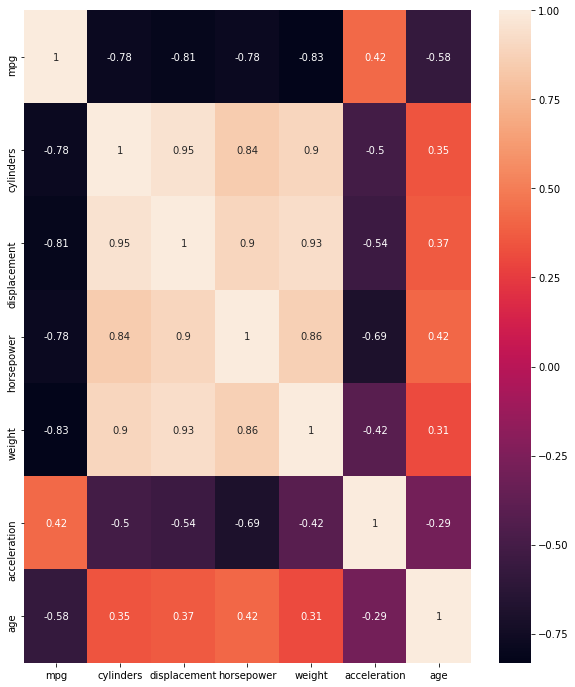

In [31]:
fig, ax = plt.subplots(figsize=(10, 12))

sns.heatmap(CarsMPG_corr, annot=True)

Heatmap based on the correlation of our features

In [32]:
CarsMPG = CarsMPG.sample(frac=1).reset_index(drop=True)
CarsMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,14.0,8,340.0,160,3609,8.0,50
1,15.0,8,350.0,145,4440,14.0,45
2,26.6,8,350.0,105,3725,19.0,39
3,24.0,4,134.0,96,2702,13.5,45
4,18.6,6,225.0,110,3620,18.7,42


In [33]:
CarsMPG.to_csv('CarsMPGProcessed.csv', index=False)

In [34]:
from sklearn.model_selection import train_test_split

X = CarsMPG[['horsepower']]
Y = CarsMPG['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
x_train.sample(5)

,horsepower
160,65
3,96
144,129
67,210
228,115


In [36]:
y_train.sample(5)

111    20.5
90     16.0
51     23.5
255    17.5
188    28.0
Name: mpg, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [39]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6024132892519038


In [40]:
y_pred = linear_model.predict(x_test)

In [41]:
from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6208145991640387


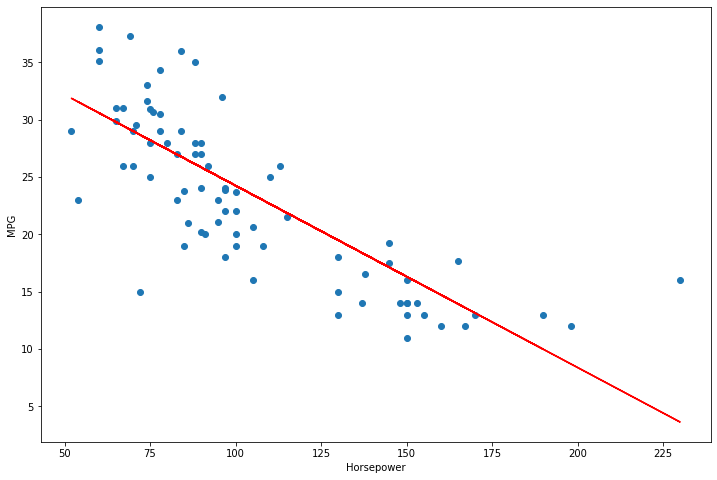

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [43]:
X = CarsMPG[['weight']]
Y = CarsMPG['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.6958139242039214
Testing score:  0.6782588039985535


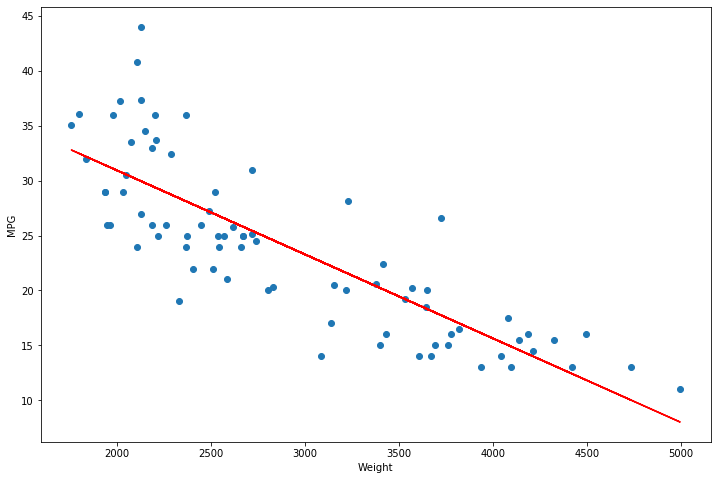

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [60]:
X = CarsMPG[['displacement', 'horsepower', 'age']]
Y = CarsMPG['mpg']

x_train, x_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2)

In [50]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6958139242039214


In [52]:
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, x_test))

Testing score:  -153427.63682491053


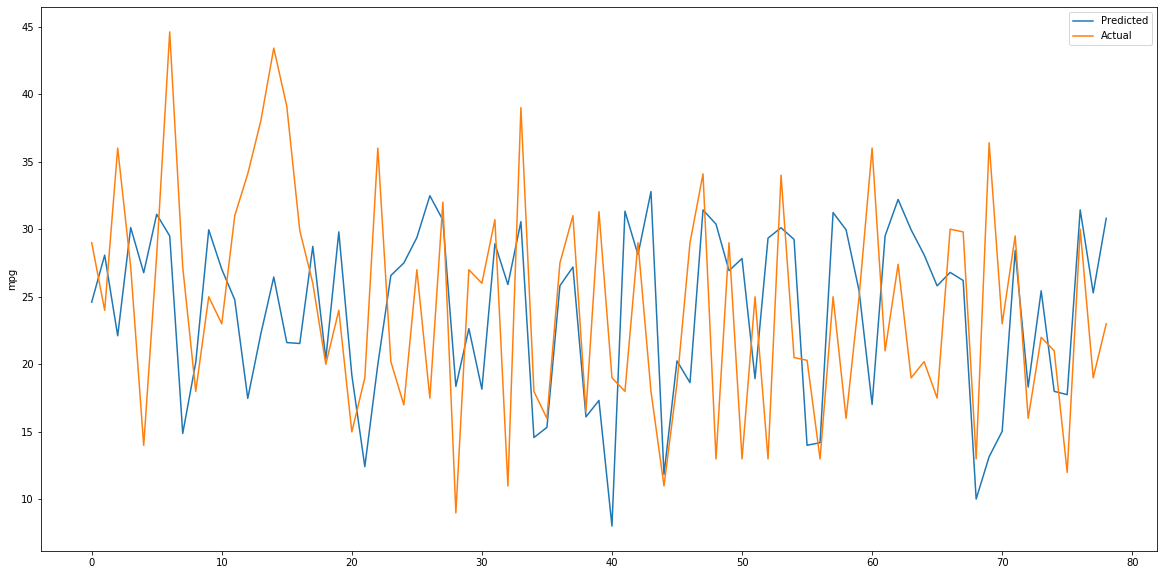

In [73]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('mpg')
         
plt.legend()
plt.show()

# END